<a href="https://colab.research.google.com/github/Robinino99/Prediction-of-Product-Sales/blob/main/Project_1_Part_3_(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Project 1 - Part 3

In [2]:
# load the google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
# import various packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
# load the cleaned file
fpath = '/content/drive/MyDrive/Coding Dojo/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023_clean.csv'
# load into dataframe
df_sales = pd.read_csv(fpath)
df_sales.head()

,Unnamed: 0,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,MISSING,Tier 3,Grocery Store,732.3800
4,4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [16]:
# get the info
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 8523 non-null   int64  
 1   Item_Identifier            8523 non-null   object 
 2   Item_Weight                8523 non-null   float64
 3   Item_Fat_Content           8523 non-null   object 
 4   Item_Visibility            8523 non-null   float64
 5   Item_Type                  8523 non-null   object 
 6   Item_MRP                   8523 non-null   float64
 7   Outlet_Identifier          8523 non-null   object 
 8   Outlet_Establishment_Year  8523 non-null   int64  
 9   Outlet_Size                8523 non-null   object 
 10  Outlet_Location_Type       8523 non-null   object 
 11  Outlet_Type                8523 non-null   object 
 12  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(2), object(7)
memory usage:

In [17]:
# drop the unnamed column

df_sales = df_sales.drop(columns = ['Unnamed: 0'], axis = 1)
df_sales

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,MISSING,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,MISSING,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [18]:
# get correlations between values

corr = df_sales.corr(numeric_only = True)
corr.round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.00,0.09,-0.01,-0.70,0.08
Item_Visibility,0.09,1.00,-0.00,-0.07,-0.13
Item_MRP,-0.01,-0.00,1.00,0.01,0.57
Outlet_Establishment_Year,-0.70,-0.07,0.01,1.00,-0.05
Item_Outlet_Sales,0.08,-0.13,0.57,-0.05,1.00


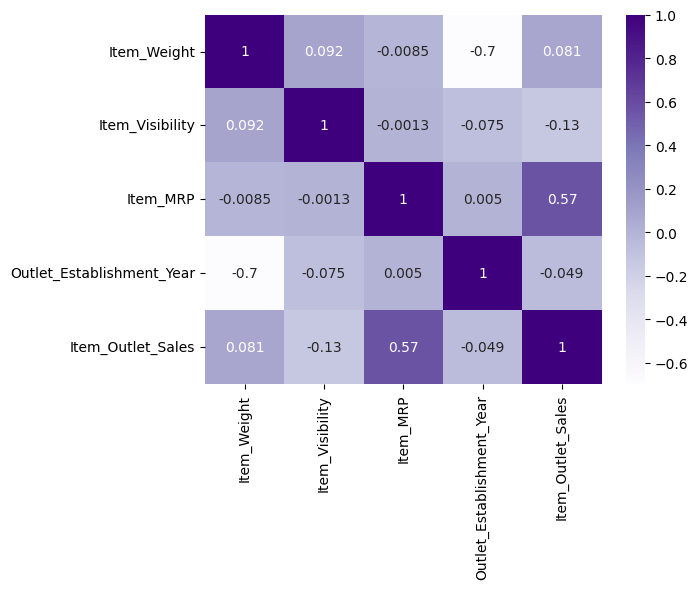

In [24]:
# create a heatmap to visualize any correlation between values and then investigate further

ax = sns.heatmap(corr, cmap = 'Purples', annot = True);

There seems to be a some correlation between the Item_MRP and the Item_outlet_Sales.

In [27]:
# lets get some summary stats for the item_outlet_sales
df_sales[['Item_Outlet_Sales', 'Item_MRP']].describe()



,Item_Outlet_Sales,Item_MRP
count,8523.000000,8523.000000
mean,2181.288914,140.992782
std,1706.499616,62.275067
min,33.290000,31.290000
25%,834.247400,93.826500
50%,1794.331000,143.012800
75%,3101.296400,185.643700
max,13086.964800,266.888400


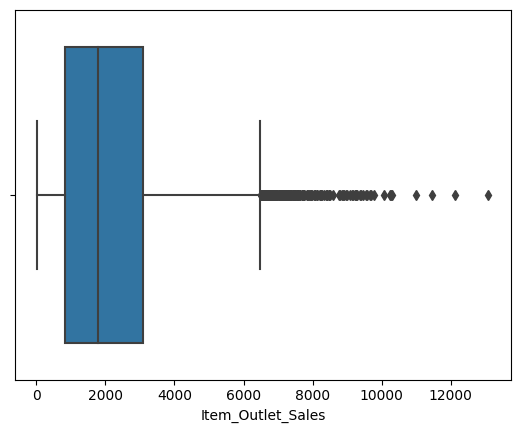

In [25]:
# create a boxplot of the above summary stats

ax = sns.boxplot(data = df_sales, x = 'Item_Outlet_Sales')

As depicted from the above boxplot, there are quite a few outliers.

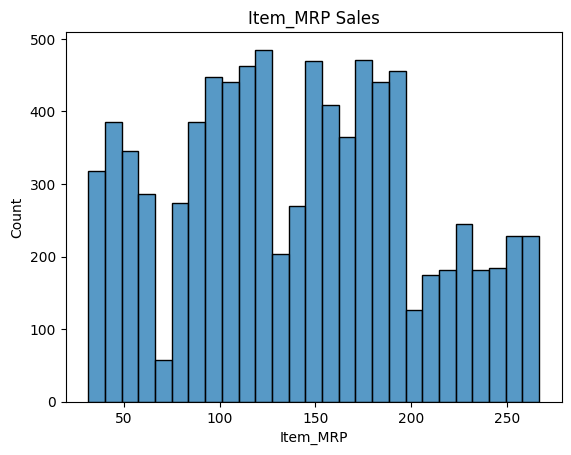

In [32]:
# create a Histogram to show the distribution of sales items

ax = sns.histplot(data = df_sales, x = 'Item_MRP')
ax.ticklabel_format(style = 'plain')
ax.set(title = 'Item_MRP Sales Distribution');

The following deductions can be made:

* Based on the above chart as the Item_MRP increase, the number of purchases begins to decrease.

* Our most competitive Item_MRP range is between 40 & 150, as most of our customers are happy to purchase products in that range.

* As soon as the Item_MRP increases beyond 200 our sales a essentially halved.





In [40]:
# Let's investigate which outlet has the most average sales

outlet_sales = df_sales.groupby('Outlet_Type')['Item_Outlet_Sales'].mean()
outlet_sales.round(2)

Outlet_Type
Grocery Store         339.83
Supermarket Type1    2316.18
Supermarket Type2    1995.50
Supermarket Type3    3694.04
Name: Item_Outlet_Sales, dtype: float64

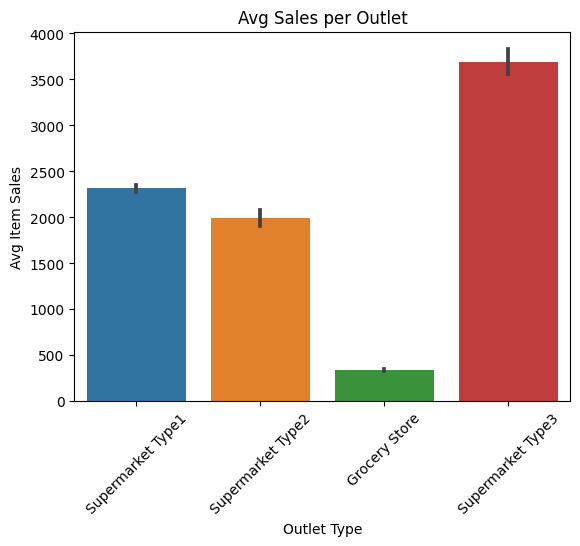

In [41]:
# Lets investigate whether the age of the store impacts the sales volumes
ax = sns.barplot(data = df_sales, x = 'Outlet_Type', y = 'Item_Outlet_Sales')
ax.tick_params(axis = 'x', rotation = 45)
ax.set_ylabel('Avg Item Sales');
ax.set_xlabel('Outlet Type');
ax.set_title('Avg Sales per Outlet');


In [42]:
# what is the most popular item

popu_item = df_sales.groupby('Item_Type')['Item_Outlet_Sales'].sum()
popu_item.round(2)

Item_Type
Baking Goods             1265525.34
Breads                    553237.19
Breakfast                 232298.95
Canned                   1444151.49
Dairy                    1522594.05
Frozen Foods             1825734.79
Fruits and Vegetables    2820059.82
Hard Drinks               457793.43
Health and Hygiene       1045200.14
Household                2055493.71
Meat                      917565.61
Others                    325517.61
Seafood                   148868.22
Snack Foods              2732786.09
Soft Drinks               892897.72
Starchy Foods             351401.25
Name: Item_Outlet_Sales, dtype: float64

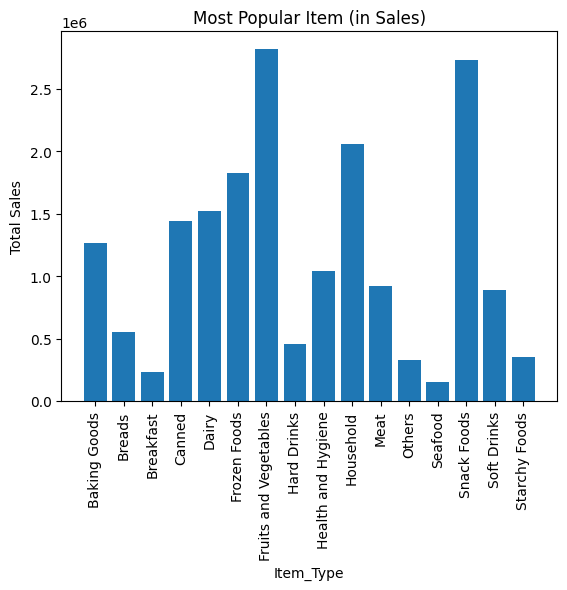

In [48]:
# create a bar graph highlighting the most popular selling products

fig, ax = plt.subplots()
ax.bar(popu_item.index, popu_item.values);
ax.tick_params(axis = 'x', rotation = 90)
ax.set_ylabel('Total Sales');
ax.set_xlabel('Item_Type');
ax.set_title('Most Popular Item ()');

As depicted in the above graph our top two selling products are
* Fruit & Veg
* Snack Foods